### 1. 일단 데이터셋이 있어야 함
1) csv파일 or excel파일 
2) 폴더 안 파일

### 2. 쓸 수 있는 데이터셋으로 뜯어고치기
- 필요한만큼 변수 정의 꼭!
- 필요에 따라 데이터 정렬
- for, if, try, def로 필요한 컬럼 정리 및 도출!!!!

## 참고

df['컬럼명']-> 시리즈\
df['컬럼명'][행,열] 순서임

if문의 조건으로 컬럼끼리 비교 => 불가\
이렇게 다 따로 비교해서 all로 적용\
condition\
= (df['MA120'] < df['MA60']) & (df['MA60'] < df['MA20']) & (df['MA20'] < df['MA5']) & (df['MA5'] < df['Close'])\
if condition.all():

if문의 조건으로 함수 적용 => 불가\
함수 적용 후 진행\
df['RSI'] = df.apply(calculate_rsi, axis=1)  # axis=1로 행 단위 적용 -> 각 행에 대해 값을 구해 하나의 열을 형성\
if (df['RSI'] >= 70).any():\
    count += 1

이전행과 비교(수동)\
df['이전 값'] = df['기준 컬럼'].shift(1)  # 이전 행 값 생성\
두 행을 비교하면 됨

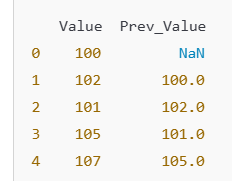

## 문제

#### 여러 기업이 있을 떄, 연속 하락장이 제일 오래 유지된 기업의 이름과 하락 일수

all_data #기업들 합쳐져있음\
all_data['변동값'] = all_data.groupby('Company')['종가'].diff() #diff는 전 행과의 차이

#변수선언\
company_name = None\
des_days = 0

for company, group in all_data.groupby('Company'): #groupby컬럼명이 매개변수로 있음 -> 컬럼의 값 가져옴\
    decline_streak = 0 #하락일수 계산용 변수

    for change in group['변동값']: #변동값 컬럼의 값을 매개변수로
        if change < 0:
            decline_streak += 1  # 주가가 하락하면 하락 일수를 증가
            
        else:
            if decline_streak > des_days: #추가하다가 이전 값보다 커지면
            
                des_days = decline_streak #재정의!
                company_name = company #재정의!
                
            decline_streak = 0  # 변동이 없으면 다음 계산을 위해 초기화

    # 마지막 확인하고 마무리
    if decline_streak > des_days:
        des_days = decline_streak
        company_name = company

#### 